<a href="https://colab.research.google.com/github/nightitachi/New-Plant-Diseases-Dataset/blob/main/New_Plant_Diseases_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


#importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

In [4]:
train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# PreProcessing Dataset

In [5]:

train_set = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [7]:
for x,y in train_set:
  print(x , x.shape)
  print(y,y.shape)


Streaming output truncated to the last 5000 lines.
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]]


 [[[143. 131. 131.]
   [126. 114. 114.]
   [147. 135. 135.]
   ...
   [102.  83.  85.]
   [122. 103. 105.]
   [126. 107. 109.]]

  [[136. 124. 124.]
   [129. 117. 117.]
   [150. 138. 138.]
   ...
   [109.  90.  92.]
   [122. 103. 105.]
   [120. 101. 103.]]

  [[144. 132. 132.]
   [136. 124. 124.]
   [134. 122. 122.]
   ...
   [113.  94.  96.]
   [118.  99. 101.]
   [109.  90.  92.]]

  ...

  [[207. 202. 199.]
   [208. 203. 200.]
   [210. 205. 202.]
   ...
   [171. 161. 162.]
   [171. 159. 161.]
   [171. 159. 161.]]

  [[210. 205. 202.]
   [208. 203. 200.]
   [207. 202. 199.]
   ...
   [170. 160. 161.]
   [171. 159. 159.]
   [172. 160. 160.]]

  [[211. 206. 203.]
   [208. 203. 200.]
   [204. 199. 196.]
   ...
   [174. 164. 165.]
   [177. 165. 165.]
   [179. 167. 167.]]]


 ...


 [[[108. 126. 104.]
   [ 88. 106.  84.]
   [ 53.

# Building The Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense , MaxPool2D , Flatten , Dropout

In [9]:
model = Sequential()

In [10]:


model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(38, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001) ,loss='categorical_crossentropy' , metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,418,762 (123.67 MB)

 Trainable params: 32,418,762 (123.67 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = model.fit(x=train_set, validation_data=validation_set, epochs=3)


Epoch 1/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 611s 266ms/step - accuracy: 0.4494 - loss: 2.0263 - val_accuracy: 0.9087 - val_loss: 0.2983
Epoch 2/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 586s 260ms/step - accuracy: 0.8719 - loss: 0.4066 - val_accuracy: 0.9627 - val_loss: 0.1194
Epoch 3/3
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 624s 261ms/step - accuracy: 0.9280 - loss: 0.2225 - val_accuracy: 0.9598 - val_loss: 0.1373


# Model Evaluation



In [18]:
train_loss , train_acc = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 111s 50ms/step - accuracy: 0.9546 - loss: 0.1503


In [19]:
valid_loss , valid_acc =model.evaluate(validation_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9601 - loss: 0.1349


# Accuracy Visualizarion

In [20]:
training_history.history

{'accuracy': [0.6519666910171509, 0.8914147615432739, 0.9341773986816406],
 'loss': [1.19615638256073, 0.3404845595359802, 0.20195546746253967],
 'val_accuracy': [0.9086563587188721, 0.9627285003662109, 0.9597837924957275],
 'val_loss': [0.29834064841270447, 0.11939472705125809, 0.13731825351715088]}

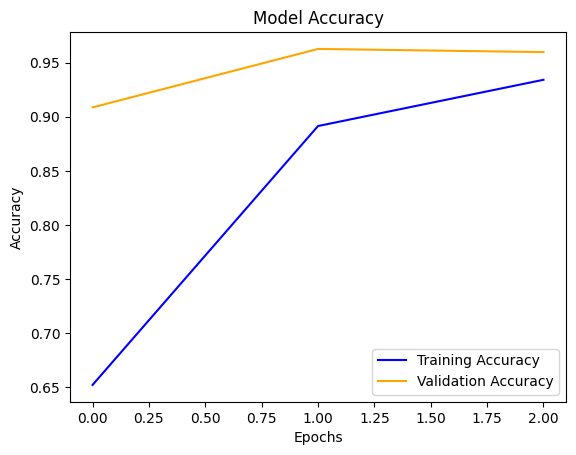

In [27]:
epochs= [i for i in range(1,4)]
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss visualization

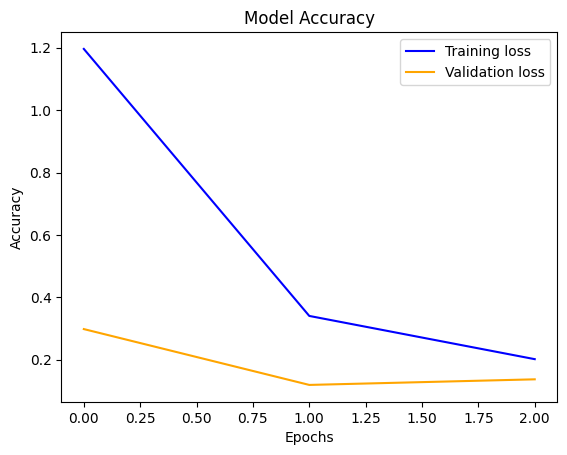

In [28]:
epochs= [i for i in range(1,4)]

plt.plot(training_history.history['loss'], label='Training loss', color='blue')
plt.plot(training_history.history['val_loss'], label='Validation loss', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving Model

In [29]:
model.save("trained_model.keras")

# Saving history

In [31]:
import json
with open('train_hist.json', 'w') as f:
    json.dump(training_history.history, f)



In [38]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Prediction Test set

In [42]:
test_dir = '/content/new-plant-diseases-dataset/test/test'

In [45]:
test_set = keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


# Prediction

In [46]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step


In [64]:
y_pred , y_pred.shape

(array([[9.98894751e-01, 8.60133696e-06, 2.82556925e-06, ...,
         1.08943965e-07, 6.62737420e-08, 1.34403450e-07],
        [9.78338718e-01, 9.44866333e-04, 6.56850534e-05, ...,
         4.45946262e-06, 3.67520784e-06, 6.99785733e-06],
        [9.99822438e-01, 2.96437929e-06, 3.43022236e-07, ...,
         1.06627908e-10, 1.30250504e-08, 5.53127428e-08],
        ...,
        [1.29941938e-07, 2.44046081e-08, 2.62524850e-06, ...,
         4.17662193e-07, 2.73166620e-07, 9.99418497e-01],
        [2.85772160e-07, 3.10831694e-09, 9.13672764e-08, ...,
         2.57444896e-07, 8.34923597e-09, 9.99963164e-01],
        [3.27717475e-09, 8.28206774e-12, 1.37717976e-10, ...,
         3.19876070e-10, 1.12994407e-07, 9.99730408e-01]], dtype=float32),
 (17572, 38))

In [60]:
prediction_categories = tf.argmax(y_pred , axis=1)
prediction_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [66]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [67]:
y_true=tf.argmax(true_categories , axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

# Confusion Matrix

In [71]:
from sklearn.metrics import classification_report , confusion_matrix

report = classification_report(y_true, prediction_categories, target_names=class_names)
print(report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.89      0.92       504
                                 Apple___Black_rot       0.99      0.92      0.95       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.99      0.76      0.86       502
                               Blueberry___healthy       0.90      0.97      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95      0.

In [74]:
cm = confusion_matrix(prediction_categories , y_true )
cm


array([[447,   2,   0, ...,   0,   0,   0],
       [  3, 456,   0, ...,   0,   0,   0],
       [  0,   1, 410, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 457,   0,   0],
       [  0,   0,   0, ...,   0, 430,   1],
       [  0,   0,   1, ...,   0,   0, 467]])

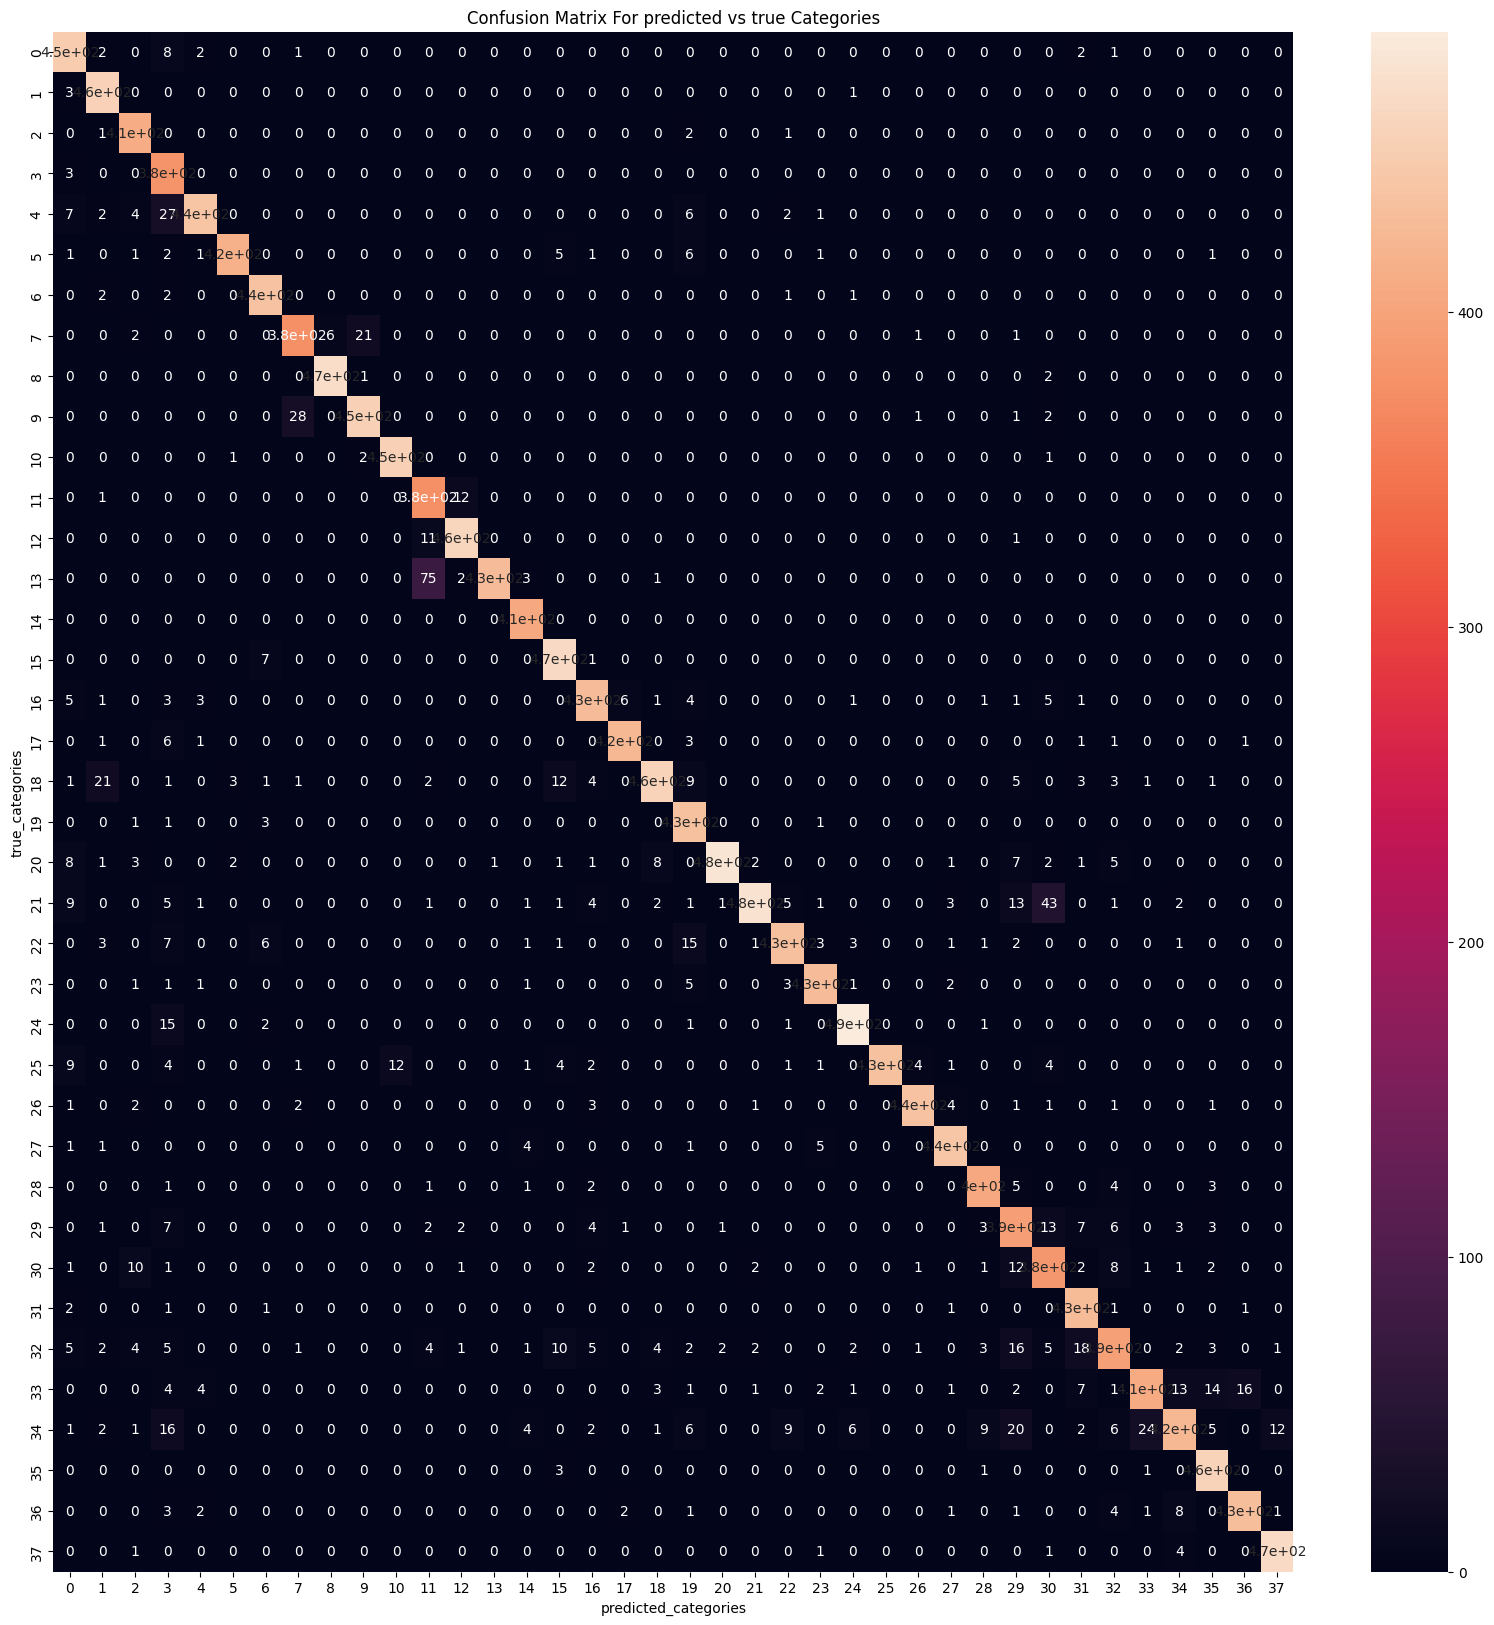

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(cm , annot=True)
plt.title('Confusion Matrix For predicted vs true Categories')
plt.xlabel('predicted_categories')
plt.ylabel('true_categories')
plt.show()